# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd
#!pip install xlrd
import xlrd

/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [2]:
df = pd.read_excel("richpeople.xlsx")

#df

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
print(len(df), "rows")
print(len(df.columns), "columns")
print("---")
df.info()

1653 rows
30 columns
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14 

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [4]:
df.sort_values(by='networthusbillion', ascending = False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [5]:
print("---   Counts:   ---")
print(df.gender.value_counts())
print("/n")
print("---   Percents:   ---")
print(round(df.gender.value_counts() / len(df) * 100, 1))

---   Counts:   ---
male      1473
female     180
Name: gender, dtype: int64
/n
---   Percents:   ---
male      89.1
female    10.9
Name: gender, dtype: float64


In [6]:
print("---   Avg. Net Worth by Gender   ---")
print(df.groupby('gender').networthusbillion.mean())

---   Avg. Net Worth by Gender   ---
gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64


## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [7]:
print("Top source of wealth:", df.sourceofwealth.mode()[0])
print("Top type of wealth:", df.typeofwealth.mode()[0])

Top source of wealth: real estate
Top type of wealth: inherited


In [8]:
df_source_by_gender = df.groupby('gender').sourceofwealth.value_counts(ascending = False)

print("Top 5 Male Billionaire Sources of Wealth By Pct.")
print(df_source_by_gender.male.sort_values(ascending=False).head(5)/len(df_source_by_gender.male)*100)
print("\n")

print("Top 5 Female Billionaire Sources of Wealth By Pct.")
print(df_source_by_gender.female.sort_values(ascending=False).head(5)/len(df_source_by_gender.female)*100)

Top 5 Male Billionaire Sources of Wealth By Pct.
sourceofwealth
real estate        17.331023
diversified        10.398614
retail             10.398614
investments        10.051993
pharmaceuticals     6.932409
Name: sourceofwealth, dtype: float64


Top 5 Female Billionaire Sources of Wealth By Pct.
sourceofwealth
diversified       9.0
real estate       7.0
media             6.0
construction      5.0
consumer goods    5.0
Name: sourceofwealth, dtype: float64


## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [9]:
#pd.set_option("display.max_columns", 200)
#print(df)

<AxesSubplot:>

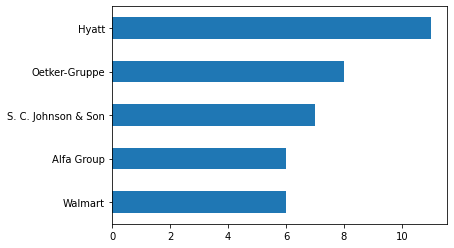

In [10]:
df.company.value_counts().sort_values(ascending=False).head(5).sort_values().plot(kind="barh")

## 7) How much money do these billionaires have in total?

In [11]:
billionaire_wealth = df.networthusbillion.sum() * 1000000000
print(f'Together, they have ${billionaire_wealth:,.2f}')

Together, they have $6,454,400,000,000.00


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [12]:
print("Here are the top 10 countries in cumulative wealth of billionaires (in billions):")
df.groupby('countrycode').networthusbillion.sum().sort_values(ascending = False).head(10)

Here are the top 10 countries in cumulative wealth of billionaires (in billions):


countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [13]:
print("The average billionaire's age is", df.age.mean().round(1), "years old")

The average billionaire's age is 63.3 years old


In [14]:
print("The average self-made billionaire is", df[df.selfmade == "self-made"].age.mean().round(1), "years old")
print("The average non-self-made billionaire is", df[df.selfmade != "self-made"].age.mean().round(1), "years old")

The average self-made billionaire is 62.6 years old
The average non-self-made billionaire is 65.0 years old


## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

Age Distribution of Billionaires:


<AxesSubplot:>

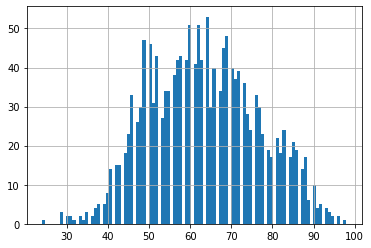

In [15]:
print("Age Distribution of Billionaires:")
df.age.hist(bins =100)

## 11) Make a scatterplot of net worth compared to age

<AxesSubplot:xlabel='networthusbillion', ylabel='age'>

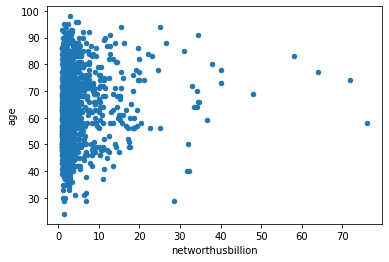

In [16]:
df.plot(
    x='networthusbillion', 
    y='age',
    kind='scatter')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<AxesSubplot:ylabel='name'>

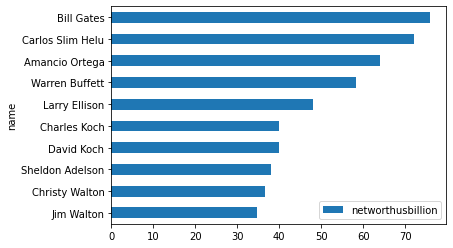

In [17]:
df.sort_values(by='networthusbillion', ascending=True) \
    .tail(10) \
    .plot(
        x='name', 
        y='networthusbillion',
        kind='barh',
        )